In [1]:
import os, sys
import numpy as np
import time
import matplotlib.pyplot as plt
import xarray as xr
from pathlib import Path

from generate_sim_data import gen_rho, gen_sim_data

In [2]:
home = str(Path.home())
save_dir = home + r'\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\Data\Simulated'

# amplitude = np.logspace(7.1, 10, 20)
amplitude = np.array([3e8])  # [Hz]
# amplitude = np.array([1e3])

# simulation resolution settings
t_sim_min = 0  # [s]
t_sim_max = 40e-9  # [s]
dt_sim = 25e-12  # [s]

tD = 25e-9  # [s] deadtime
Nshot = int(1e1)  # number of laser shots
wrap_deadtime = True  # wrap deadtime between shots
window_bnd = [28e-9, 34e-9]  # [s] time-of-flight bounds
laser_pulse_width = 500e-12  # [s] laser pulse width (sigma)
target_time = 31.2e-9  # [s] target location in time
background = 1e1  # [Hz] background count rate (dark count)

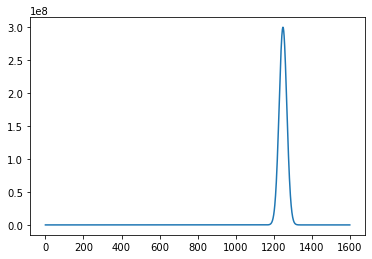

time elapsed: 0.00871586799621582


In [3]:
for i in range(len(amplitude)):
    
    target_amplitude = amplitude[i]
    
    ### GENERATE SIMULATED DATA ###
    det_idx, phot_idx, sync_idx, det_sync_idx, phot_sync_idx, det_events, phot_events = gen_sim_data(t_sim_max, dt_sim,
                                                                                                     tD, Nshot,
                                                                                                     wrap_deadtime,
                                                                                                     window_bnd,
                                                                                                     laser_pulse_width,
                                                                                                     target_time,
                                                                                                     target_amplitude,
                                                                                                     background)

    time_tag_index = det_idx
    true_time_tag_index = phot_idx
    sync_index = sync_idx
    time_tag = det_events
    true_time_tag = phot_events
    time_tag_sync_index = det_sync_idx
    true_time_tag_sync_index = phot_sync_idx

    # Save simulated data to netCDF
    sim_data = xr.Dataset(
        data_vars=dict(
            time_tag=(['time_tag_index'], time_tag),
            time_tag_sync_index=(['time_tag_index'], time_tag_sync_index),
            true_time_tag=(['true_time_tag_index'], true_time_tag),
            true_time_tag_sync_index=(['true_time_tag_index'], true_time_tag_sync_index),
            laser_pulse_width=laser_pulse_width,
            target_time=target_time,
            target_amplitude=target_amplitude,
            background=background
        ),
        coords=dict(
            sync_index=(['sync_index'], sync_index)
        )
    )

    fname = r'\sim_amp{:.1E}_nshot{:.1E}.nc'.format(target_amplitude, Nshot)
    sim_data.to_netcdf(save_dir+fname)